Descriptive analysis of austin weather data found [here](https://www.kaggle.com/grubenm/austin-weather).

Some questions/ideas to consider:
  * What weeks/months have the most precipitation? Most humidity? Most wind?
  * How is wind and precipitation related? Does increased wind mean more rain?
  * In what weeks/months is the range of temperatures the least? i.e. most temperate time periods?
  * Use this data to summarize the climate of Austin. 

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

%matplotlib inline

In [2]:
df = pd.read_csv('austin_weather.csv')
df.replace('-', np.nan, inplace=True)
df.replace('T', np.nan, inplace=True)

for col in df:
    if col != 'Date' and col != 'Events':
        df[[col]] = df[[col]].astype(float)
        
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
del df['Date']

In [3]:
# Fancy pandas datetimeindexing
df[datetime(2014, 5, 3):datetime(2014, 5, 6)]

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-05-03,94.0,76.0,58.0,42.0,35.0,26.0,44.0,27.0,10.0,30.06,30.00,29.95,10.0,10.0,10.0,13.0,4.0,20.0,0.0,
2014-05-04,91.0,76.0,61.0,42.0,37.0,32.0,37.0,27.0,16.0,30.09,30.02,29.94,10.0,10.0,10.0,14.0,7.0,23.0,0.0,
2014-05-05,92.0,76.0,60.0,59.0,56.0,44.0,90.0,61.0,32.0,30.01,29.91,29.79,10.0,10.0,10.0,16.0,8.0,27.0,0.0,
2014-05-06,87.0,76.0,65.0,64.0,62.0,57.0,87.0,66.0,45.0,29.87,29.81,29.72,10.0,10.0,10.0,17.0,9.0,29.0,0.0,


In [4]:
# I love it :D
df['5/3/2014':'5/6/2014']

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-05-03,94.0,76.0,58.0,42.0,35.0,26.0,44.0,27.0,10.0,30.06,30.00,29.95,10.0,10.0,10.0,13.0,4.0,20.0,0.0,
2014-05-04,91.0,76.0,61.0,42.0,37.0,32.0,37.0,27.0,16.0,30.09,30.02,29.94,10.0,10.0,10.0,14.0,7.0,23.0,0.0,
2014-05-05,92.0,76.0,60.0,59.0,56.0,44.0,90.0,61.0,32.0,30.01,29.91,29.79,10.0,10.0,10.0,16.0,8.0,27.0,0.0,
2014-05-06,87.0,76.0,65.0,64.0,62.0,57.0,87.0,66.0,45.0,29.87,29.81,29.72,10.0,10.0,10.0,17.0,9.0,29.0,0.0,


### What weeks/months have the most precipitation? Most humidity? Most wind?

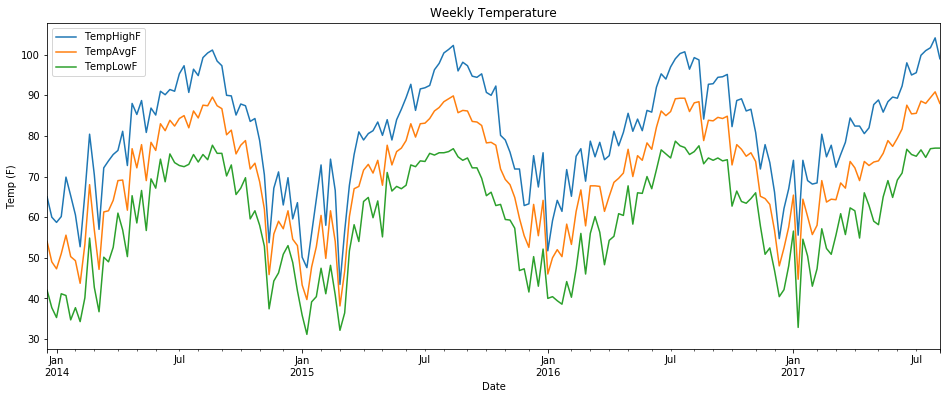

In [5]:
df[['TempHighF', 'TempAvgF', 'TempLowF']].resample('W').mean().plot(title='Weekly Temperature', figsize=(16, 6))

plt.ylabel('Temp (F)')
plt.show()

The above plot demonstrates the seasonality of the weather in Austin. The average temperature is around 50 degrees only about 2-4 months of the year (November - February). The weekly low temperarture always stays above 30 degrees in this span of time.

By May the weekly avg temperature has already hit 70 degrees and remains there until October/November.

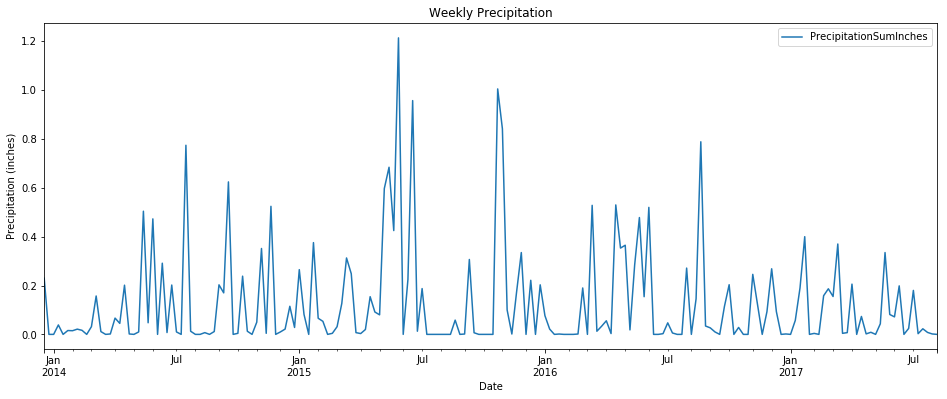

In [6]:
df[['PrecipitationSumInches']].resample('W').mean().plot(title='Weekly Precipitation', figsize=(16, 6))

plt.ylabel('Precipitation (inches)')
plt.show()

The weekly precipitation is less seasonal than the temperature. However, we do see spikes in the months May,June, July of each year. The months of May-July 2016 had the highest average precipitation. A similar period of high avergae precipitation was observed in November 2016.

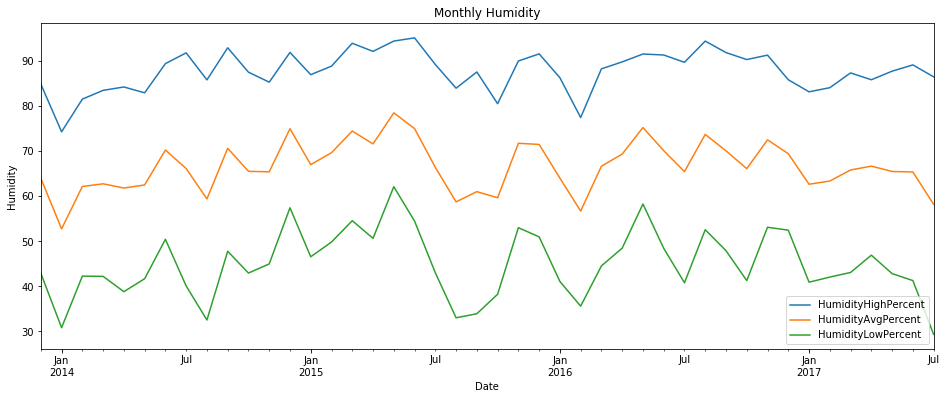

In [7]:
df[['HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent']].resample('M').mean().plot(title='Monthly Humidity', figsize=(16, 6))

plt.ylabel('Humidity')
plt.show()

Humidity does not vary much across time in Austin. Above, we see high, mean, and low humidity values averaged by month. Lets quantify this variation a bit more.

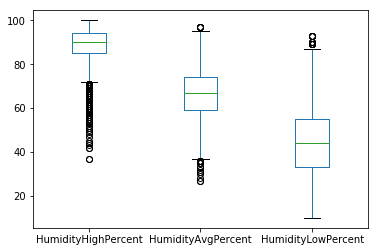

In [8]:
df[['HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent']].plot.box()
plt.show()

In [9]:
q3 = df[['HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent']].quantile(.75)
q1 = df[['HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent']].quantile(.25)

iqr = q3-q1

iqr

HumidityHighPercent     9.0
HumidityAvgPercent     15.0
HumidityLowPercent     22.0
dtype: float64

The blox plot demonstrates the lower variability in humidity across time. Most of the high and average daily humidity values are contained within a small range of the median of the data. The daily humidity highs also have many outliers below 70% and all the way to 40% humidity.

We print out the interquartile ranges of the humidity features. Notice, the middle 50% of the HumidityAvgPercent variable is contained within a range of 15% humidity.

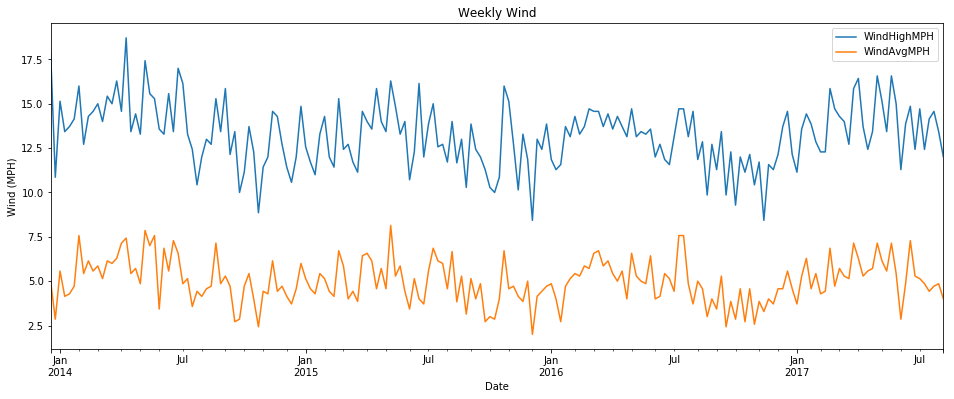

In [10]:
df[['WindHighMPH', 'WindAvgMPH']].resample('W').mean().plot(title='Weekly Wind', figsize=(16, 6))

plt.ylabel('Wind (MPH)')
plt.show()

If we plot the mean weekly wind, we notice a seasonal pattern. Winds increase from February through August each year, with highs around May and June. The winds die down after this period and hit lows in November and December of each year.

### How is wind and precipitation related? Does increased wind mean more rain?

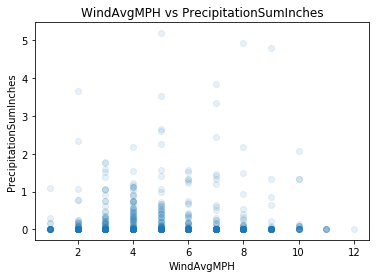

In [121]:
plt.scatter(df['WindAvgMPH'], df['PrecipitationSumInches'], alpha=.1)

plt.title('WindAvgMPH vs PrecipitationSumInches')
plt.xlabel('WindAvgMPH')
plt.ylabel('PrecipitationSumInches')
plt.show()

The above scatter plot doesn't seem to tell us much. What about looking at the distributions of precipitation on days when the wind is lower than the median wind versus days when wind is higher than the median?

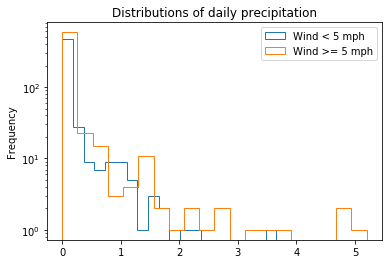

In [124]:
mask = df['WindAvgMPH'] < df['WindAvgMPH'].quantile(.5)

lower = df[mask]
higher = df[~mask]

plt.title('Distributions of daily precipitation')

lower['PrecipitationSumInches'].plot.hist(bins=20, histtype='step', label='Wind < 5 mph')
higher['PrecipitationSumInches'].plot.hist(bins=20, histtype='step', label='Wind >= 5 mph')

plt.legend()
plt.yscale('log')
plt.show()

This looks a bit more telling. Since the data are split evenly (since we're using the median) we can compare these histograms on the same plot. If we look at the data on a log y scale (since most of the precipitation is at or near 0), the longer right tail on the days with wind >= 5 mph tell us that there is higher precipitation on those days. However, the counts are low since we're using a log y scale.

What about plotting box plots of precipitation for the days of rain or thunderstorm vs no event?

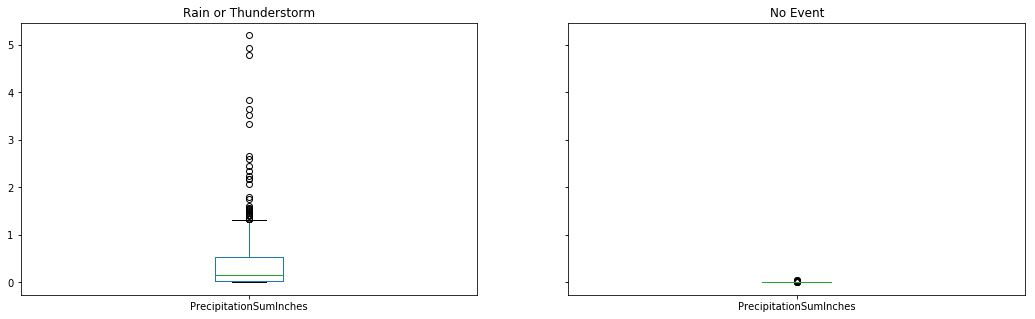

In [117]:
# There has to be a better way of doing this
# I don't want subplots, I want all of the plots in one chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5), sharey=True)

df[(df['Rain'] == 1) | (df['Thunderstorm'] == 1)]['PrecipitationSumInches'].plot.box(ax=axes[0])
axes[0].set_title('Rain or Thunderstorm')

df[df['No Event'] == 1]['PrecipitationSumInches'].plot.box(ax=axes[1])
axes[1].set_title('No Event')
    

plt.show()

This plot is a lot more telling. When there is No Event recorded, precipitation is at about 0. No shit, Luig LOL

TODO improve these explanations

In [11]:
df.resample('M').mean

<bound method f of DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]>

In [12]:
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
Date,,,,,,,,,,,,,,,,,,,,
2013-12-21,74.0,60.0,45.0,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
2013-12-22,56.0,48.0,39.0,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,
2013-12-23,58.0,45.0,32.0,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,
2013-12-24,61.0,46.0,31.0,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,
2013-12-25,58.0,50.0,41.0,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,


In [13]:
df.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1319.000000,1319.000000,1319.000000,1312.000000,1312.000000,1312.000000,1317.000000,1317.000000,1317.000000,1316.000000,1316.000000,1316.000000,1307.000000,1307.000000,1307.000000,1317.000000,1317.000000,1315.000000,1195.000000
mean,80.862775,70.642911,59.902957,61.515244,56.632622,50.933689,87.872437,66.671982,44.958998,30.112204,30.022903,29.931892,9.991584,9.162204,6.840092,13.231587,5.008352,21.373384,0.126268
std,14.766523,14.045904,14.190648,13.586452,14.866272,16.187480,11.038637,12.463634,16.974632,0.180149,0.172145,0.172144,0.163489,1.458883,3.683453,3.425096,2.086450,5.875657,0.448189
min,32.000000,29.000000,19.000000,13.000000,8.000000,2.000000,37.000000,27.000000,10.000000,29.630000,29.550000,29.410000,5.000000,2.000000,0.000000,6.000000,1.000000,9.000000,0.000000
25%,72.000000,62.000000,49.000000,53.000000,46.000000,38.000000,85.000000,59.000000,33.000000,29.990000,29.910000,29.820000,10.000000,9.000000,3.000000,10.000000,3.000000,17.000000,0.000000
50%,83.000000,73.000000,63.000000,66.000000,61.000000,56.000000,90.000000,67.000000,44.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,92.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,55.000000,30.210000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.010000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000


In [14]:
df.columns

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches',
       'Events'],
      dtype='object')

In [15]:
list(df['Events'].unique())

['Rain , Thunderstorm',
 ' ',
 'Rain',
 'Fog',
 'Rain , Snow',
 'Fog , Rain',
 'Thunderstorm',
 'Fog , Rain , Thunderstorm',
 'Fog , Thunderstorm']

### One-Hot encode each of the 'Events' strings

In [16]:
events = ['Rain', 'Thunderstorm', 'Fog', 'Snow']

for event in events:
    df[event] = False
    
for event in events:
    mask = df['Events'].apply(lambda row: event in row)
    df.loc[mask, event] = True
    
df['No Event'] = False
df.loc[~df[events].any(axis=1), 'No Event'] = True

events.append('No Event')

In [17]:
event_freq = df[events].sum()
event_freq.sort_values(ascending=False, inplace=True)

event_freq_rel = event_freq / df.shape[0]

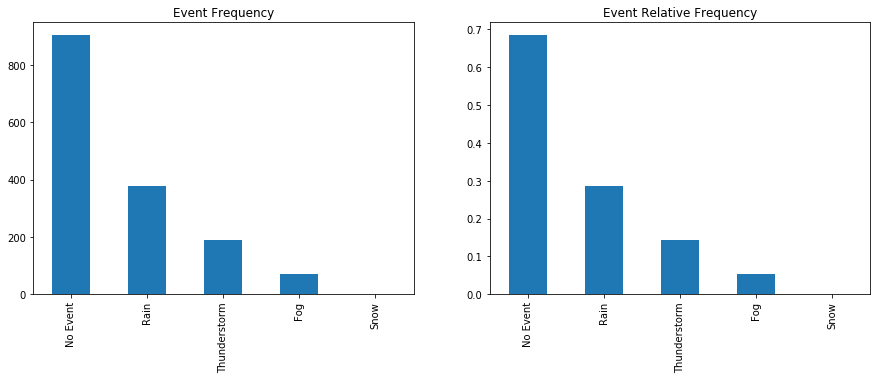

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

event_freq.plot.bar(ax=axes[0]); axes[0].set_title('Event Frequency');
event_freq_rel.plot.bar(ax=axes[1]); axes[1].set_title('Event Relative Frequency');

In [19]:
event_stats = pd.concat([event_freq, event_freq_rel], axis=1)
event_stats.columns = ['Count', 'Frequency']
event_stats

,Count,Frequency
No Event,903,0.684610
Rain,377,0.285823
Thunderstorm,188,0.142532
Fog,69,0.052312
Snow,1,0.000758


No events are recorded for 68% percent of the days contained within the dataset.

A rain event has been recorded for 29% of the days and Thunderstorm events have been recorded for 14% of all days.

Let's examine visibility data grouped by each of the events.

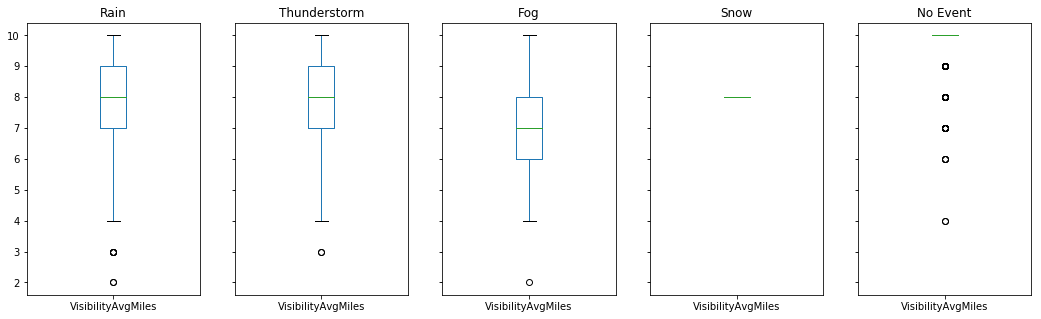

In [20]:
# There has to be a better way of doing this
# I don't want subplots, I want all of the plots in one chart
fig, axes = plt.subplots(nrows=1, ncols=len(events), figsize=(18, 5), sharey=True)

for i, event in enumerate(events):
    df[df[event] == True]['VisibilityAvgMiles'].plot.box(ax=axes[i])
    axes[i].set_title(event)

Visibility is lowest on days when there is fog. Visibility is lower on days when there is rain or thunderstorm than when there are not events.

Mean TempAvgF 70.6429112964
Stdev TempAvgF 14.0459038041


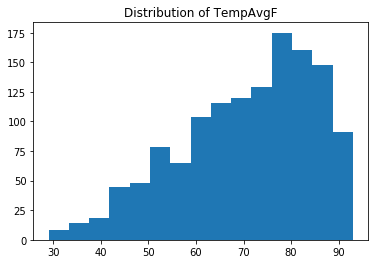

In [22]:
print('Mean TempAvgF', df['TempAvgF'].mean())
print('Stdev TempAvgF', df['TempAvgF'].std())

plt.title('Distribution of TempAvgF')
bins = plt.hist(df['TempAvgF'], 15)
plt.show()

The distribution of the daily average temperature is left skewed and bimodal with peaks around 75 and 80 degrees. The mean temperature is about 71 degrees with a standard deviation of 14 degrees.

In [23]:
print('Temperature | Counts')
list(zip(bins[1], bins[0]))

Temperature | Counts


[(29.0, 8.0),
 (33.266666666666666, 14.0),
 (37.533333333333331, 18.0),
 (41.799999999999997, 45.0),
 (46.066666666666663, 48.0),
 (50.333333333333329, 78.0),
 (54.600000000000001, 65.0),
 (58.866666666666667, 104.0),
 (63.133333333333333, 116.0),
 (67.400000000000006, 120.0),
 (71.666666666666657, 129.0),
 (75.933333333333337, 175.0),
 (80.200000000000003, 160.0),
 (84.466666666666669, 148.0),
 (88.733333333333334, 91.0)]

The distribution of the daily high temperature is left skewed and unimodal The mean temperature is about 81 degrees, 10 degrees higher than the mean average daily temperature, and has a standard deviation of 15 degrees. The distribution is shaped similarly to the mean daily average temperature.

Mean TempHighF 80.8627748294
Stdev TempHighF 14.7665229141


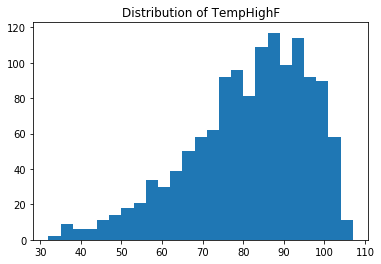

In [24]:
print('Mean TempHighF', df['TempHighF'].mean())
print('Stdev TempHighF', df['TempHighF'].std())

plt.title('Distribution of TempHighF')
plt.hist(df['TempHighF'], 25)
plt.show()

The distribution of the daily low temperature is left skewed and unimodal. The mean temperature is about 60 degrees, 11 degrees lower than the mean average daily temperature, and has a standard deviation of 14 degrees. The distributions left tail drops off less dramatically than the mean daily avg temp. This is expected because the left tail corresponds to lower temperatures and these are the daily low temperatures.

Mean TempLowF 59.9029567854
Stdev TempLowF 14.1906479941


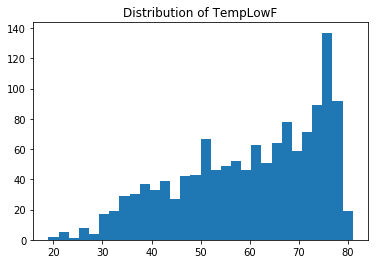

In [25]:
print('Mean TempLowF', df['TempLowF'].mean())
print('Stdev TempLowF', df['TempLowF'].std())

plt.title('Distribution of TempLowF')
plt.hist(df['TempLowF'], 30)
plt.show()

Here we are scattering the daily low temperatures vs the high temperatures. We see a positive linear relationship, as expected, since the daily low temperature should not be drastically lower than a daily high temperature.

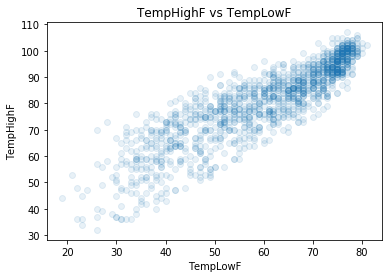

In [26]:
plt.title('TempHighF vs TempLowF')
plt.scatter(df['TempLowF'], df['TempHighF'], alpha=.1)
plt.xlabel('TempLowF')
plt.ylabel('TempHighF')
plt.show()

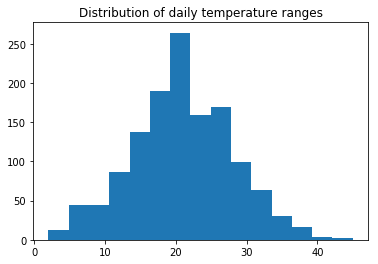

In [27]:
df['TempRange'] = df['TempHighF'] - df['TempLowF']

plt.title('Distribution of daily temperature ranges')
plt.hist(df['TempRange'], 15)
plt.show()

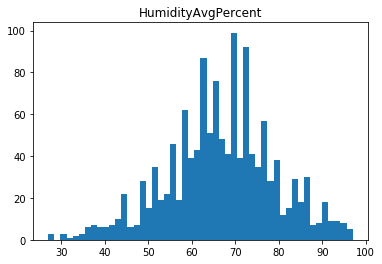

In [28]:
# remove nan rows
non_nan_HumidityAvgPercent = df[~np.isnan(df['HumidityAvgPercent'])]['HumidityAvgPercent']

plt.title('HumidityAvgPercent')
plt.hist(non_nan_HumidityAvgPercent, 50)
plt.show()

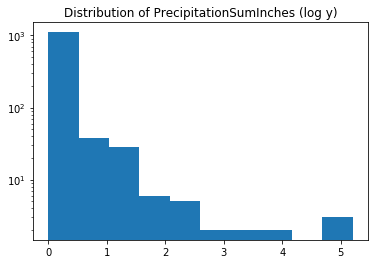

In [29]:
plt.title('Distribution of PrecipitationSumInches (log y)')
plt.hist(df[~df['PrecipitationSumInches'].isnull()]['PrecipitationSumInches'], 10)
plt.yscale('log')
plt.show()

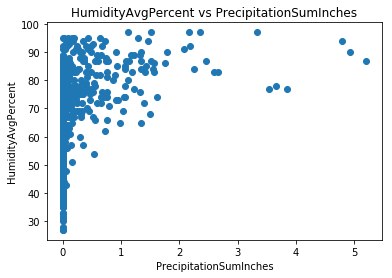

In [30]:
plt.title('HumidityAvgPercent vs PrecipitationSumInches')

plt.scatter(df['PrecipitationSumInches'], df['HumidityAvgPercent'])
plt.xlabel('PrecipitationSumInches')
plt.ylabel('HumidityAvgPercent')
plt.show()

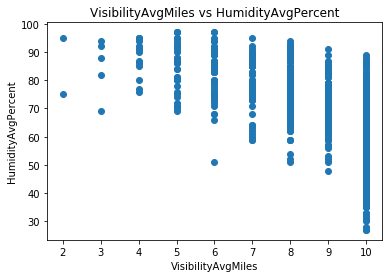

In [31]:
plt.title('VisibilityAvgMiles vs HumidityAvgPercent')

plt.scatter(df['VisibilityAvgMiles'], df['HumidityAvgPercent'])
plt.xlabel('VisibilityAvgMiles')
plt.ylabel('HumidityAvgPercent')
plt.show()

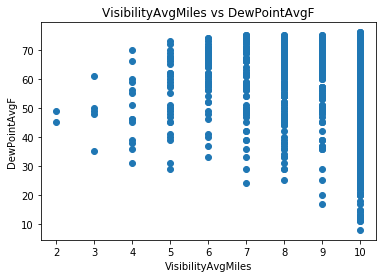

In [32]:
plt.title('VisibilityAvgMiles vs DewPointAvgF')

plt.scatter(df['VisibilityAvgMiles'], df['DewPointAvgF'])
plt.xlabel('VisibilityAvgMiles')
plt.ylabel('DewPointAvgF')
plt.show()

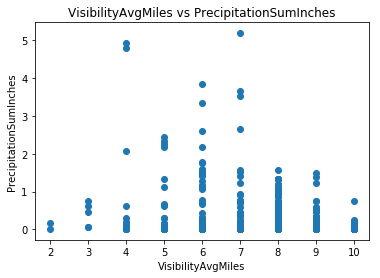

In [33]:
plt.title('VisibilityAvgMiles vs PrecipitationSumInches')

plt.scatter(df['VisibilityAvgMiles'], df['PrecipitationSumInches'])
plt.xlabel('VisibilityAvgMiles')
plt.ylabel('PrecipitationSumInches')
plt.show()